In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


## Regularization parameter: Lasso
The  𝜆  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  𝜆  is too large, all parameters will be set to zero.

Create a plot below of how  𝑅2  varies across different values of  𝜆  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  𝑅2  for a given lambda value?

Submit your work and discuss the results with your mentor.

In [29]:
#Lasso Regression
alphaL = []
r_squaredL = []
for a in np.linspace(0.001, 1, 100):
    lassBig = linear_model.Lasso(alpha = a)
    lassBig.fit(X_train2, Y_train)
    alphaL.append(a)
    r_squaredL.append(lassBig.score(X_test2, Y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [30]:
#Ridge Regression
alphaR = []
r_squaredR = []
for a in np.linspace(0.001, 1, 100):
    ridgeBig = linear_model.Ridge(alpha = a)
    ridgeBig.fit(X_train2, Y_train)
    alphaR.append(a)
    r_squaredR.append(ridgeBig.score(X_test2, Y_test))

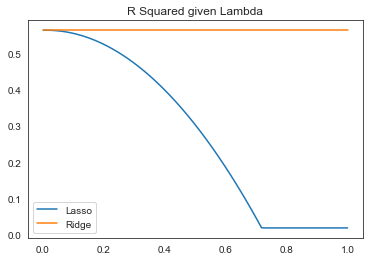

In [32]:
plt.plot(alphaL, r_squaredL, label = 'Lasso')
plt.plot(alphaR, r_squaredR, label = 'Ridge')
plt.title('R Squared given Lambda')
plt.legend()
plt.show()

No Lasso and Ridge Regression DO NOT yield the same R Squared value for a given Lambda. Once Lambda gets bigger(closer to 1) Lasso Regression R Squared Value decreases while Ridge R Squared stays relatively the same. 

In [34]:
r_squaredR

[0.5629993374908541,
 0.5629991931004643,
 0.5629992215285712,
 0.5629992555389183,
 0.5629992910431441,
 0.5629993271592884,
 0.5629993635836943,
 0.5629994001837857,
 0.5629994368924507,
 0.5629994736720805,
 0.5629995104999472,
 0.5629995473615292,
 0.5629995842470968,
 0.5629996211498839,
 0.5629996580650636,
 0.5629996949890727,
 0.5629997319192332,
 0.5629997688535063,
 0.5629998057902814,
 0.5629998427283087,
 0.5629998796665795,
 0.5629999166042634,
 0.5629999535406924,
 0.5629999904753245,
 0.5630000274076787,
 0.5630000643373829,
 0.563000101264098,
 0.5630001381875449,
 0.5630001751074798,
 0.5630002120237094,
 0.5630002489360394,
 0.5630002858443137,
 0.5630003227484013,
 0.5630003596481763,
 0.5630003965435408,
 0.5630004334343919,
 0.5630004703206434,
 0.5630005072022308,
 0.5630005440790833,
 0.5630005809511338,
 0.5630006178183345,
 0.5630006546806388,
 0.5630006915379945,
 0.5630007283903695,
 0.5630007652377259,
 0.5630008020800249,
 0.5630008389172447,
 0.56300087574

In [35]:
r_squaredL

[0.5631934565757893,
 0.5633440106631951,
 0.5632410919961068,
 0.5628853412378318,
 0.5623238087206515,
 0.5615402747007632,
 0.5605352118218208,
 0.5593084389491815,
 0.5578599560828452,
 0.5561897632228121,
 0.554297860369082,
 0.5521842475216552,
 0.5498489246805314,
 0.5472918918457105,
 0.5445131490171928,
 0.5415126961949784,
 0.538290533379067,
 0.5348466605694586,
 0.5311810777661534,
 0.5272937849691512,
 0.5231847821784523,
 0.5188540693940564,
 0.5143016466159634,
 0.5095275138441738,
 0.5045316710786871,
 0.49931411831950356,
 0.4938748555666231,
 0.48821388282004585,
 0.48233120007977154,
 0.4762268073458006,
 0.4699007046181325,
 0.4633513224158012,
 0.4565806698119396,
 0.4495882677324771,
 0.4423740556941239,
 0.43493803043923396,
 0.42728018885132385,
 0.4194005278048665,
 0.41129967894717545,
 0.4029770579837917,
 0.39443197473110236,
 0.38566577723679885,
 0.37667780250964444,
 0.3674680490107497,
 0.3580365151988627,
 0.3483831995303701,
 0.3385081004592979,
 0.328